In [2]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

ModuleNotFoundError: No module named 'google'

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
base_path = Path() # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

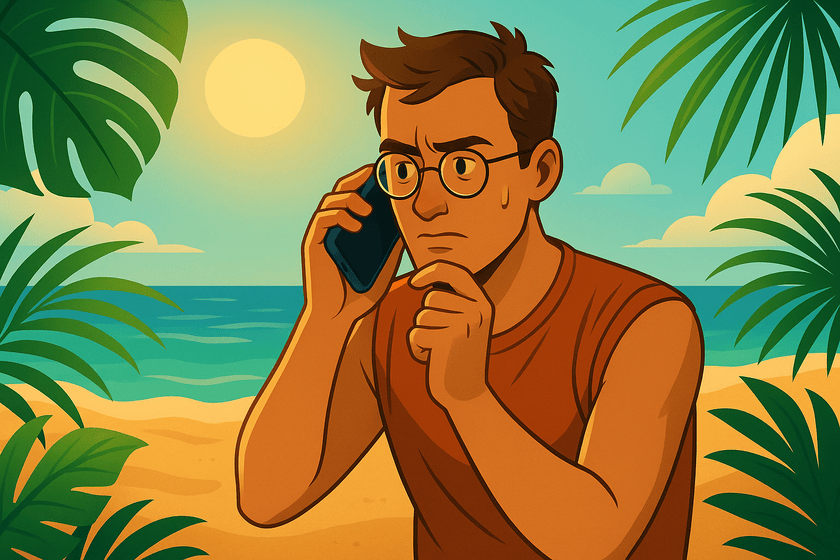

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


# Importuje potrzebne biblioteki oraz sprawdzam podstawowe informacje:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')

display(titanic_df.isnull().sum())
display(titanic_df.describe())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,98


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,793.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,33.123938
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,51.578312
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Usuwam oraz uzupełniam kategorie


## Usuwam

*   Cabin - posiada bardzo dużo braków
*   Name, Ticket oraz Passanger ID - nie oferują istotnych danych

## Uzupełniam

*   Age oraz Fare - medianą z pozostałych danych
*   Embarked - najczęsciej występującą daną


In [ ]:
# Usunięcie Cabin i Name PassengerId
titanic_df.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

# Uzupełnienie braków
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

titanic_df.head(10)


/tmp/ipython-input-4139015015.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
/tmp/ipython-input-4139015015.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,14.5000,S
9,1,2,female,14.0,1,0,30.0708,C


# Zamieniam format kategori Sex oraz Embarked na liczbowe

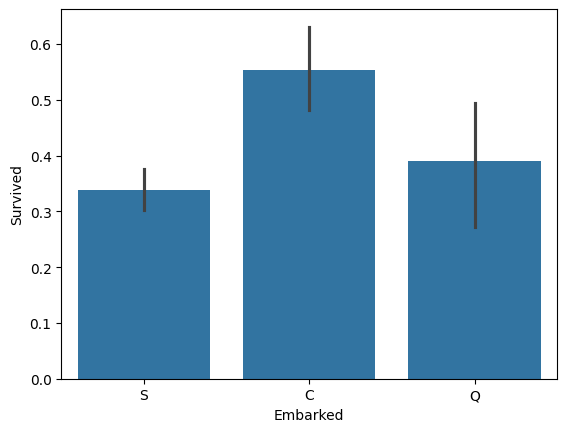

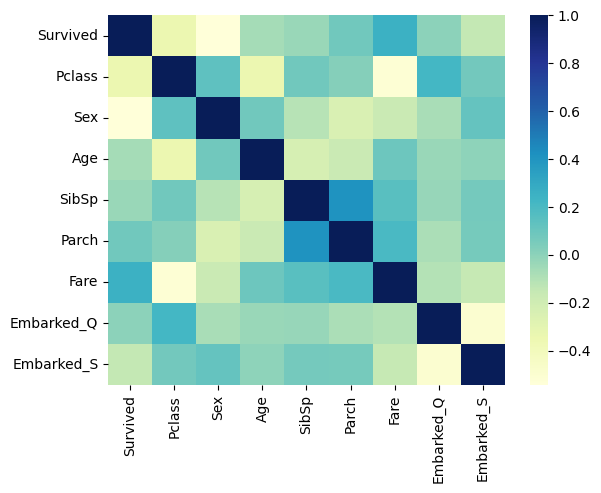

In [ ]:

titanic_df['Sex'] = titanic_df['Sex'].map({'female': 0, 'male': 1})

sns.barplot(x='Embarked', y='Survived', data=titanic_df)
plt.show()

titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

titanic_df.head(10)

sns.heatmap(titanic_df.corr(), cmap="YlGnBu")
plt.show()


## Na podstawie heatmapy widzę, że Pclass, Sex oraz Fare najsliniej korelują z Survived

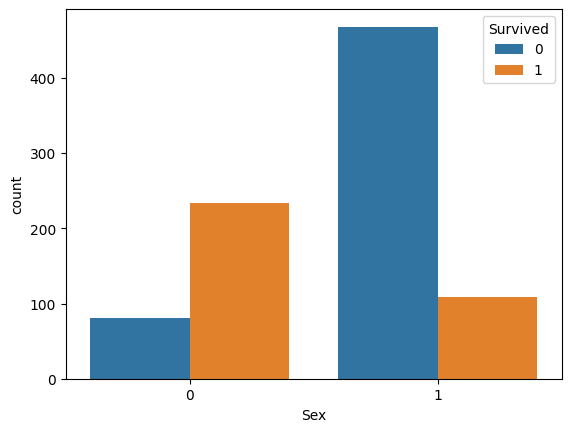

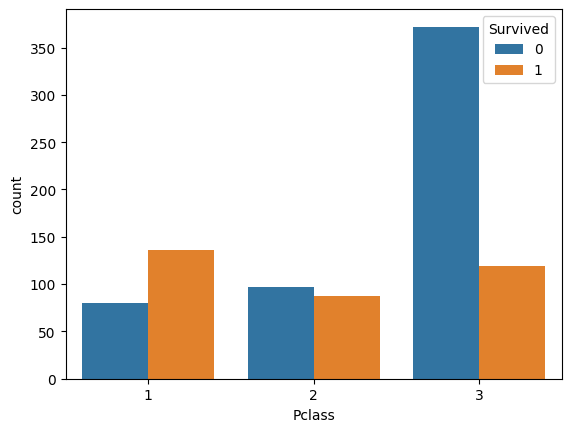

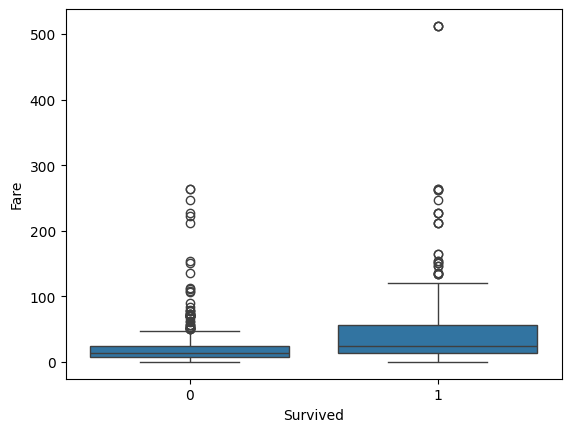

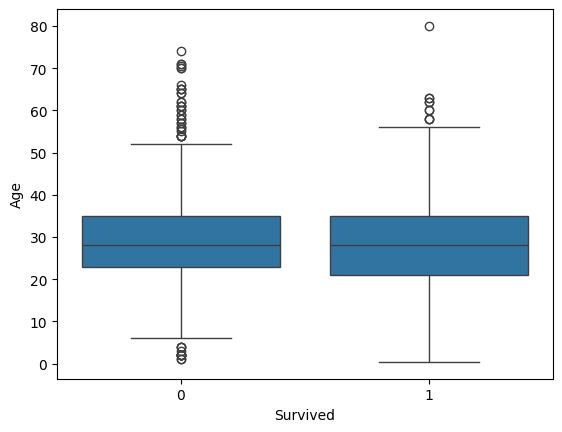

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.show()

sns.boxplot(x='Survived', y='Fare', data=titanic_df)
plt.show()

sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.show()


## Jak widać wiek nie miał determinującego wpływu na przeżycie.
## Według predykcji, płeć - kobiety oraz klasa - 1 miały większe szanse na przeżycie.
## Tak samo fare - opłata za przejazd miała lekki wpływ im wyższa tym większa szansa na przeżycie.

# Dodaje nowa kolumne - IsAlone oraz FamilySize

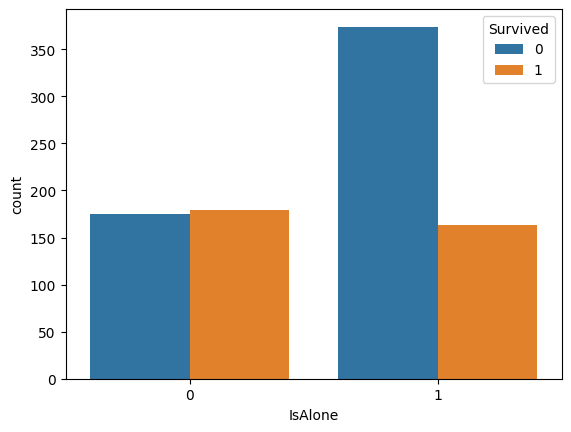

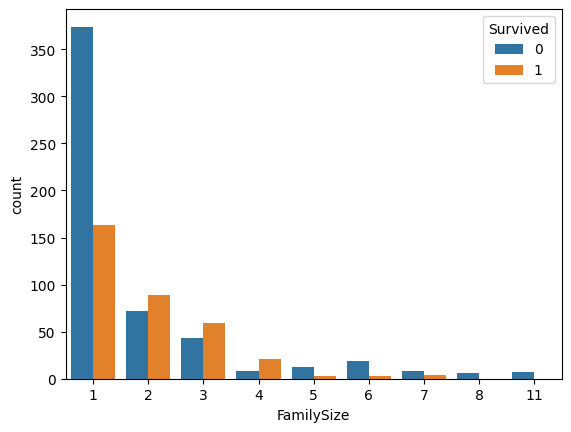

In [ ]:

# Tworzymy kolumnę FamilySize
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Tworzymy kolumnę IsAlone (1 jeśli pasażer podróżował sam, 0 w przeciwnym razie)
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1
titanic_df.head(10)

sns.countplot(x='IsAlone', hue='Survived', data=titanic_df)
plt.show()

sns.countplot(x='FamilySize', hue='Survived', data=titanic_df)
plt.show()


## Widać, że family size również ma wpływ na Survived. Osoby z rodziną 2,3,4, osbową miały największe szanse. Osoby samotne miały mniejsze szanse przeżycia.

# Sprawdzam czy dzieci miały większe szanse na przeżycie

In [ ]:
# Tworzymy kolumnę IsChild (1 jeśli wiek < 12, inaczej 0)
titanic_df['IsChild'] = (titanic_df['Age'] < 12).astype(int)

# Sprawdzamy przeżywalność dzieci vs dorosłych
survival_by_child = titanic_df.groupby('IsChild')['Survived'].mean()
print(survival_by_child)

titanic_df.head()



IsChild
0    0.368165
1    0.573529
Name: Survived, dtype: float64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone,IsChild
0,0,3,1,22.0,1,0,7.2500,False,True,2,0,0
1,1,1,0,38.0,1,0,71.2833,False,False,2,0,0
2,1,3,0,26.0,0,0,7.9250,False,True,1,1,0
3,1,1,0,35.0,1,0,53.1000,False,True,2,0,0
4,0,3,1,35.0,0,0,8.0500,False,True,1,1,0


# Podsumowanie oraz wnioski:

*   Kobiety miały większą szanse na przeżycie
*   Bilety z klasy 1 dawały większą szanse na przeżycie
*   Cena biletu korelowała z klasą biletu przez co dawała większą szansę na przeżycie
*   Wiek na 1 rzut oka nie wpływał samemu na końcowy wynik, ale po sprawdzaniu widać, że dzieci < 12 miały większe szanse
*   Osoby z rodziną miały większe szanse na przeżycie   



